#Introduction

This notebook is about k-nearest neighbor, an easy algorithm but can be developed into different variant. The goal is to introduce you to one more algorithm, and also the process of inventing new algorithms.

load data set

In [1]:
# prompt: load iris data set into Xs and Ys ready to be processed by a knn

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
Xs = iris.data
ys = iris.target


In [2]:
print(Xs)
print(ys)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#1-NN

Let's say this is your second year in grad school in a CS PhD program. You have problem in understanding linear algebra or calculus, you are not there yet to fully comprehend stuff like neural network. So you start with something easy, 1-nearest neighbor algorithm.

The oldest trick in the book, also a basic retrieval method in Case-based reasoning. The very simple 1-nearest neighbor algorithm states that, you can memorize all your training samples in a case base, and when a new query shows up, you try to find the most similar case in your case base. You don't know the classification of your query (that's why it's a query, or a test case), but you know the label of your training samples. So you use the label of the most similar training sample, as the classification label for the query.

Contrast to neural network, which learns a pattern through a generalization process. 1-NN does not learn a rule/pattern, instead it memorizes past scenarios and retrieve them when needed.

There are a few design question remains for the description above.

1. How do you store cases/samples in your case base?
2. How to find the most similar sample given a query? Alternatively, how do you retrieve a sample given a query.

Step 2 requires a smilarity metric, a metric showing how similar two samples are. It takes in two samples and outputs a number (representing the distance between the two samples). Given a query, you want to find the training sample with the least distance to the query.

For our purpose here, we will use the L1-norm distance. So, for example, the distance between (a1, b1) and (a2, b2) is (|a1-a2|+ |b1-b2|)

DONE:: Implement 1-NN `one_NN_vanilla`

In [3]:
import math
##IMPORTANT, you should not use case base in a global manner since we run multiple experiments here
## Doing that will make your code prone to error. (You might overwrite when unaware)
##Do no uncomment things below, they can lead to bugs.
# case_base_x = []
# case_base_y = []

class one_NN_vanilla:
    def __init__(self):
        self.case_base_x = []
        self.case_base_y = []
        self.metric = None

    def training(self,Xs, ys):
        #DONE
        self.case_base_x = Xs
        self.case_base_y = ys


    def use_similarity_metric(self,op):
        self.metric = op

    def testing(self,query):
        neighbor_index = None
        min_dis = math.inf
        #DONE
        for i in range(len(self.case_base_x)):
          sample = self.case_base_x[i]
          dis = similarity_1(sample,query)
          if dis < min_dis:
            min_dis = dis
            neighbor_index = i
        return self.case_base_y[neighbor_index]





def similarity_1(x, y):
    '''
    input: two samples. x and y are each a list of features.
    output: the distance between the two samples
    '''
    #use absolute distance between the features of two samples
    # or absolute norm
    #https://en.wikipedia.org/wiki/Norm_(mathematics)
    #DONE
    difference = np.subtract(x,y)
    abs = np.absolute(difference)
    sum = np.sum(abs)
    return sum


If you implement your 1-NN correctly, the code below should work.

In [4]:
# prompt: 10 fold cross validation with my Xs and ys

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def k_fold_cross_validation(Xs, ys, nn_algorithm, metric):
  kf = KFold(n_splits=10)
  accuracies = []
  for train_index, test_index in kf.split(Xs):
    X_train, X_test = Xs[train_index], Xs[test_index]
    y_train, y_test = ys[train_index], ys[test_index]
    model = nn_algorithm()
    model.use_similarity_metric(metric)
    model.training(X_train, y_train)
    y_pred = []
    for x in X_test:
      model.testing(x)
      y_pred.append(model.testing(x))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
  return np.mean(accuracies)



In [5]:
print(k_fold_cross_validation(Xs, ys, one_NN_vanilla, similarity_1))


0.9533333333333334


I got accuracy of 0.95333 in my 10-fold cross validation. This is actually not an over-fit. (Unless I am making some mistakes about my code) It's simply because iris is an easy data set, that happen to be well handled by our 1-NN.

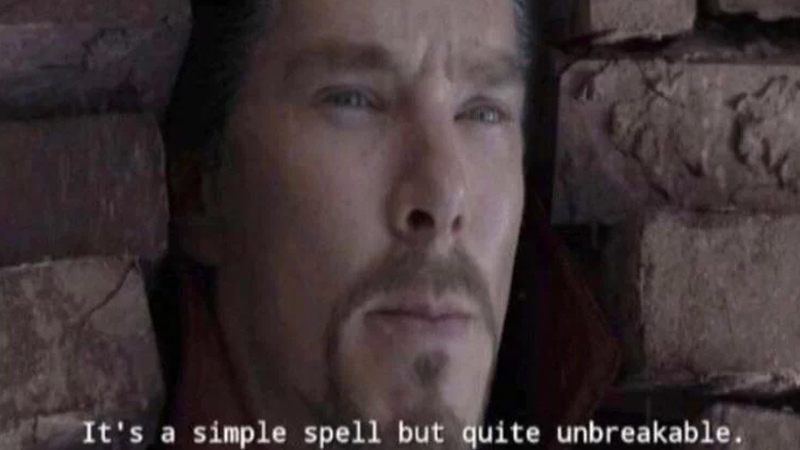

Note, you probably shouldn't get 1.0 accuracy. If you do, you might be doing something wrong.

DONE:: use the Off-the-shelf 1-NN here and examine the average accuracy in a 10-fold cross validation.

In [6]:
# prompt: 10 cross validation

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load data set
iris = datasets.load_iris()
Xs = iris.data
ys = iris.target

# 10-fold cross validation
kf = KFold(n_splits=10)
accuracies = []
for train_index, test_index in kf.split(Xs):
  #use the training data for training, testing data for testing.
  X_train, X_test = Xs[train_index], Xs[test_index]
  y_train, y_test = ys[train_index], ys[test_index]
  ##TODO
  ##hint: use KNeighborsClassifier(n_neighbors=1), you need to pass in the parameter n_neighbors otherwise you are not using 1-NN.
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)


print(np.mean(accuracies))


0.96


I got an accuracy of 0.96

Extra Credit (1) TODO::

The off-the-shelf one has slight difference in terms of result as ours.

The folds are the same (by default, no shuffling or randomization is going on). In other words, the two 1-NN is gettingn slightly different result even though they are trained and tested on the same data in multiple folds.

Can you spot the difference? (This requires diving into the documentation of the off-the-shelf 1-NN).

#k-NN

Ok, iris is too easy. How about something harder.

We will create data set with 1000 samples. Not too many. Not too little.

In [7]:
n_samples = 1000

##Data set 1

Following code creates a data set.

In [8]:
# prompt: generate a data set with two classes, from two normal distributions, the X is of dimension 2

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples, n_features=2, centers=[[-3,0],[3,0]], cluster_std=1, random_state=0)


In [9]:
print(X)
print(y)

[[-4.04855297 -1.42001794]
 [-1.23594765  0.40015721]
 [ 2.50420451  1.21657771]
 ...
 [ 3.60711167 -1.04817041]
 [ 4.63159743  0.37775917]
 [ 2.02759711  1.34622107]]
[0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0
 1 1 1 

DONE::

Plot the data.

Describe what the data set looks like.  

The data set has two columns as the x variables. The values of x in the first column range from -3 to 3. The values in the second column of x range from -6 to 6. Then the y values are simply 1 or 0 depending on if the value of x's first dimension is less than 0.

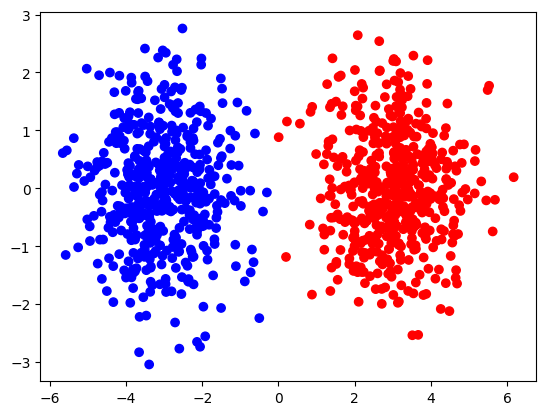

In [10]:
#DONE
import matplotlib.pyplot as plt
color = np.where(y == 0,"blue","red")
plt.scatter(X[...,0],X[...,1], c = color)
plt.show()

In [11]:
X.shape

(1000, 2)

In [12]:
y.shape

(1000,)

Is this data set easy or hard?

Let's try our 1-NN on it.

In [13]:
print(k_fold_cross_validation(X, y, one_NN_vanilla, similarity_1))


0.998


I got 0.998.

##Data set 2

In [14]:
X, y = make_blobs(n_samples, n_features=2, centers=[[-1, 0],[1, 0]], cluster_std=1, random_state=0)


DONE::

Plot the data.

Describe how it is different from Data set 1 (the previous one)

This data set does not have a clear boundary to classify sample. There are red samples that are mixed in with the blue and vice versa. This makes classification for our 1-NN model much harder.

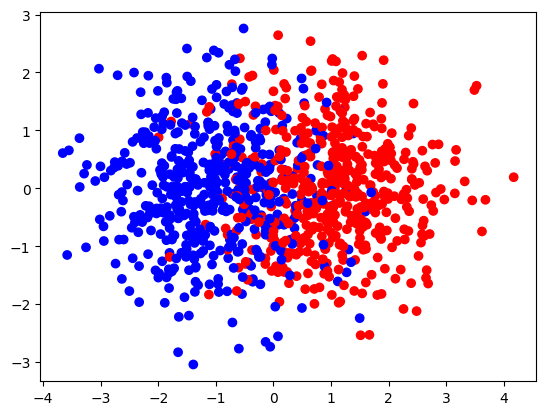

In [15]:
#DONE
color = np.where(y == 0,"blue","red")
plt.scatter(X[...,0],X[...,1], c = color)
plt.show()


DONE:: let's run our 1-NN on this again.

In [16]:
model = one_NN_vanilla
print(k_fold_cross_validation(X, y, model, similarity_1))


0.7849999999999999


In [17]:
len(X)

1000

DONE::

You should be getting not-so-good accuracy now. Why is the accuracy low?

The accuracy is low because the 1-NN model is misclassifying examples. The model is making mistakes because the base cases are not clearly sparated. So, there are queries where the nearest neighbor is red; however, the query is really blue. The mistake comes from only having one neighbor.

##Building k-NN

A k-NN is one step forward from 1-NN. Given a query, you consider the k nearest neighbors of the query, instead of just 1 (the nearest neighbor). The k neighbors collectively vote for the final decision of the classifier.

DONE:: Modify your 1-NN to build k-NN. Instead of taking only the 1 nearest neighbor. Takes n, and use their class labels to vote. The final label will be the majority of the vote.

In [18]:
v1 = []
v1.append([0,1])
v1.append([2,3])
v1.append([0,5])
v1.append([3,1])
print(v1)

max_count = -math.inf
majority = None
for i in range(len(v1)):
  cur_class = v1[i][1]
  class_count = 0
  for j in range(len(v1)):
    if cur_class == v1[j][1]:
      class_count += 1
  if class_count > max_count:
    max_count = class_count
    majority = cur_class
print(max_count,majority)

[[0, 1], [2, 3], [0, 5], [3, 1]]
2 1


In [19]:
class k_NN_vanilla:

    def __init__(self, k = 3):
        self.case_base_x = []
        self.case_base_y = []
        self.metric = None
        self.k = k
    #DONE
    def training(self,Xs,ys):
        #DONE
        self.case_base_x = Xs
        self.case_base_y = ys

    def use_similarity_metric(self,op):
        self.metric = op

    def testing(self,query):
        #DONE
        # calculate distances
        distances = []

        for i in range(len(self.case_base_x)):
          distance = self.metric(self.case_base_x[i],query)
          distances.append([distance,self.case_base_y[i]])

        distances.sort(key=lambda x: x[0]) # I used ChatGPT to sort distances by the distance in each element

        # get nearest neighbors
        nearest = distances[:self.k]


        # get majority class

        max_count = -math.inf
        majority = None
        classes_visited = []

        for i in range(len(nearest)):
          cur_class = nearest[i][1]
          class_count = 0

          if cur_class not in classes_visited:
            classes_visited.append(cur_class)
            for j in range(len(nearest)):
              if cur_class == nearest[j][1]:
                class_count += 1

              if class_count > max_count:
                max_count = class_count
                majority = cur_class

        return majority

As a sanity check, if you set the default value of K to 1, it should have the same performance as your 1-NN. If not, you are doing something wrong, go back and debug.

DONE:: Set your default k to 1, and run the following code will carry out the 10 fold cross validation experiment. And get the same result as before. If you get different result from before, double check your code.

In [20]:
print(k_fold_cross_validation(X, y, k_NN_vanilla, similarity_1))

0.825


DONE:: modify the default k back to 5. Run the experiment below to see the accuracy of 5-NN.

In [21]:
print(k_fold_cross_validation(X, y, k_NN_vanilla, similarity_1))


0.825


DONE:: do you get better accuracy now? I do, I get a very similar accuracy. When k is 1 I get 0.783 and when k is 5 I get 0.823.

Can you try different values of k to see if you can get even better accuracy?

When I set k to 3 I get an accuracy of 0.828. When k is 2 I get 0.783. When k is 4 I get 0.818.

Side note: Depends on your task domain, you may have other creative designs. For example, you might do a 5-NN, but with the rule that if the query perfectly matches with a sample, just use the label of the sample.

#Instance-weighted k-NN



Another design is the so-called instance-weighted k-NN, or weighted k-NN. The idea is that the votes by samples closer to the query should hold a higher weight than samples far from the query. Notice that the distance calculation is still the same (not weighted), but the voting process is weighted by distances.

Imagine a weird data set like this.

In [37]:
X = [[10, 10], [11,10], [11,11] ,[10,11], [0,0]]
y = [0,0,0,0,1]
X = np.array(X)
y = np.array(y)

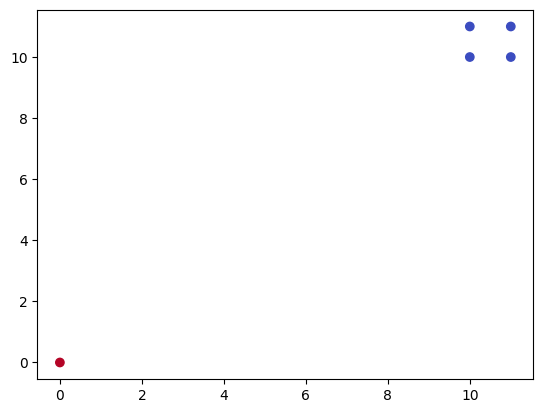

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

DONE:: In this scenario, if you happen to be using 3-NN or 5-NN, instead of 1-NN, then what will your classifier decide given any query? The classifier will always decide the query is blue.

DONE:: Explain why? This will happen because no matter where you place the query there will always be more blue than red neighbors. Because the majority of the neighbors are blue that is what the query will be classified as even if the query is right next to the red.

If you are not so sure with the answer, try it out with the code below. Try give your classifier on different queries. What does your classifier say?

In [39]:
classifier = k_NN_vanilla(3)
classifier.training(X, y)
classifier.use_similarity_metric(similarity_1)
query = [1,1]
classifier.testing(query)


0

After you have answered the last question and comprehended what's going on. You should realize, why weighted k-NN can fix this issue.

DONE:: Build instance-weighted k-NN now. The weighting method is provided: The weight of an instance is the inverse of the distance between the query and the sample. So the farther away the sample is from the query, the less weight the sample's vote is.

Hint:: The distance calculation is still the same (not weighted), but the voting process is weighted by distances.

In [40]:

v1 = []
v1.append([3,1])
v1.append([2,3])
v1.append([4,1])
v1.append([2,3])
print(v1)


max_weight = -math.inf
majority = None

for i in range(len(v1)):
  cur_class = v1[i][1]
  class_weight = 0

  for j in range(len(v1)):
    if cur_class == v1[j][1]:
      class_weight += v1[j][0]

    if class_weight > max_weight:
      max_weight = class_weight
      majority = cur_class

print( majority )




'''
classes_visited = []
for i in range(len(v1)):
          cur_class = v1[i][0]
          if cur_class not in classes_visited:
            classes_visited.append(cur_class)
            dis_of_class = 0
            print("cur_class: ", cur_class)
            for j in range(len(v1)):
              if v1[j][0]==cur_class:
                dis_of_class = dis_of_class + v1[j][1]
            print("dis_of_class: ", dis_of_class)
print(classes_visited)
'''



[[3, 1], [2, 3], [4, 1], [2, 3]]
1


'\nclasses_visited = []\nfor i in range(len(v1)):\n          cur_class = v1[i][0]\n          if cur_class not in classes_visited:\n            classes_visited.append(cur_class)\n            dis_of_class = 0\n            print("cur_class: ", cur_class)\n            for j in range(len(v1)):\n              if v1[j][0]==cur_class:\n                dis_of_class = dis_of_class + v1[j][1]\n            print("dis_of_class: ", dis_of_class)\nprint(classes_visited)\n'

In [41]:
class instance_weighted_k_NN:

    def __init__(self, k = 5):
        self.case_base_x = []
        self.case_base_y = []
        self.metric = None
        self.k = k
    #TODO
    def training(self,Xs, ys):
        #DONE
        self.case_base_x = Xs
        self.case_base_y = ys

    def use_similarity_metric(self,op):
        self.metric = op

    def testing(self,query):
        #DONE
        # calculate distances
        distances = []

        for i in range(len(self.case_base_x)):
          distance = self.metric(self.case_base_x[i],query)
          distances.append([self.weight(distance),self.case_base_y[i]])

        distances.sort(key=lambda x: x[0]) # I used ChatGPT to sort distances by the distance in each element

        # get nearest neighbors
        nearest = distances[-self.k:]

        # get weighted majority

        max_weight = -math.inf
        majority = None
        classes_visited = []

        for i in range(len(nearest)):
          cur_class = nearest[i][1]
          class_weight = 0


          if cur_class not in classes_visited:
            classes_visited.append(cur_class)

            for j in range(len(nearest)):
              if cur_class == nearest[j][1]:
                class_weight += nearest[j][0]

            if class_weight > max_weight:
              max_weight = class_weight
              majority = cur_class


        return majority



    #hint: use this weighting
    def weight(self, dis):
        return 1/ dis


Side note: other weighting methods also exist.

DONE:: Run the code below, you should classify it as class 1 instead of 0 now, because the query is closer to the class 1 sample.

In [42]:
classifier = instance_weighted_k_NN(3)
classifier.training(X, y)
classifier.use_similarity_metric(similarity_1)
query = [3,1]
classifier.testing(query)

1

let's plot out a figure showing the class distribution of the sample space.

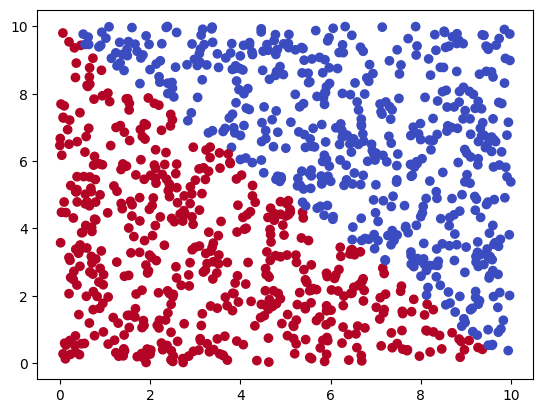

In [43]:
classifier = instance_weighted_k_NN(1)
classifier.training(X, y)
classifier.use_similarity_metric(similarity_1)

samples = np.random.rand(1000,2)
samples*=10

samples_y = np.zeros(len(samples))
for i in range(len(samples)):
    query = samples[i]
    samples_y[i] = classifier.testing(query)

#scatter plot
plt.scatter(samples[:,0], samples[:,1], c=samples_y, cmap='coolwarm')
plt.show()

You should get something like this:

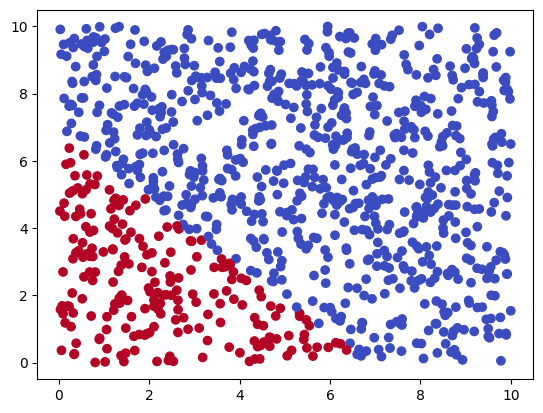

If not, your instance-weighted k-NN is not implemented correctly. Go back and check.

DONE:: explain why the figure looks like that. The figure looks like that because they are closer to the samples that are of class 1 according to our weights assigned to each sample.

DONE:: modify your default `k` for your `instance_weighted_k_NN`. Plot the class distribution again. Do you get a different plot or the same? Explain why they are different or the same.
When I set my k to 1 the line splits the points in half diagonally. When I change my default k to 12 I get a different plot. The region that is red is smaller. The plot is different because as you increase the number of k the weight of class blue is greater than the weight of class red. So, to be classified as red the points have to be closer to red points the more k is increased.  

#Feature-weighted 1-NN

But we are not done yet. k-NN is a simple algorithm, but that actually leaves quite a lot of space to be creative about things. People may heard of the 1-NN, k-NN, and weighted k-NN. What I am going to show you is a special variation.

Just like fried rice. Fried rice is super simple, everyone gets chicken fried rice, beef fried rice all the time, but there are secret recipes such as drunken man fried rice, or basil fried rice with shrimp. Next time you go to a Thai restaurant, see if they have something like that.

OK. So imagine now that this is your dataset.

##Data set 3

In [44]:
X, y = make_blobs(n_samples, n_features=2, centers=[[-1, 0],[1, 0]], cluster_std=[[0.4,2],[0.4,2]], random_state=0)


DONE:: Plot the data. Describe how it is different from data set 1 and 2.
The scale of the y-axis is larger than in data set 1 and 2. The scale of the x-axis is smaller than in data set 1 & 2.

Hint: when you plot, pay attention to the scale of the coordinate systems.

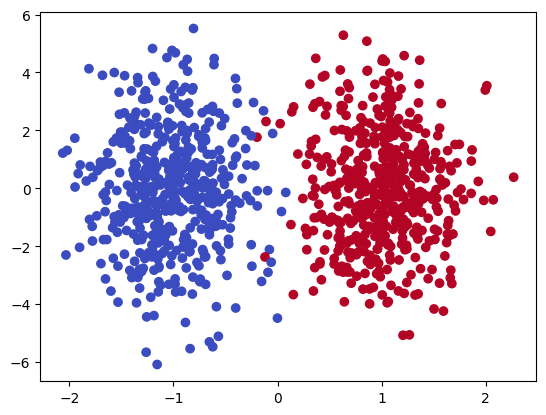

In [45]:
#DONE
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

OK. let's try one more. Run the code below.

In [46]:
X, y = make_blobs(n_samples, n_features=2, centers=[[-1, 0],[0, 0],[1,0]], cluster_std=[[0.4,2],[0.4,2],[0.4,2]], random_state=0)


In [47]:
print(X)
print(y)

[[-1.41942119 -2.84003587]
 [-0.29437906  0.80031442]
 [ 0.8016818   2.43315543]
 ...
 [ 0.24284467 -2.09634081]
 [ 0.65263897  0.75551834]
 [ 0.61103884  2.69244215]]
[0 0 2 1 2 1 0 0 2 1 1 0 2 0 2 0 1 2 2 2 2 2 0 2 0 1 1 0 0 1 1 2 2 2 1 1 2
 1 0 2 2 2 0 0 2 2 2 0 0 1 1 0 0 0 1 2 1 2 0 1 0 1 0 0 1 1 0 2 0 0 0 1 0 0
 1 0 0 2 0 0 0 1 2 0 2 1 1 0 1 0 2 1 1 0 0 0 2 1 1 0 2 0 0 1 2 0 1 2 0 0 2
 0 2 0 2 2 1 1 0 0 2 2 0 0 1 0 0 0 1 0 0 1 2 2 0 2 1 0 2 0 1 2 2 0 2 2 2 0
 2 0 0 1 0 0 1 1 2 0 0 0 0 0 2 2 0 0 1 1 0 1 2 2 0 2 1 0 1 0 0 0 1 1 1 2 1
 2 1 1 2 1 0 2 1 0 1 1 1 0 2 1 2 0 2 1 2 0 0 2 0 0 0 0 0 0 2 2 1 2 1 0 1 0
 0 0 2 2 2 1 0 2 1 1 2 2 0 1 2 2 0 0 2 2 0 2 2 1 2 2 2 0 1 0 2 2 2 0 2 1 1
 0 2 2 2 1 0 2 2 2 2 2 1 1 0 1 1 0 0 1 1 0 2 1 2 1 0 2 2 1 1 0 0 1 0 2 2 1
 1 2 0 0 1 0 0 0 2 0 2 0 2 1 2 1 0 1 0 1 1 0 2 1 2 2 0 1 1 1 2 1 0 1 0 1 0
 2 0 2 2 1 1 0 1 0 2 0 0 2 1 2 2 0 0 0 0 2 2 2 2 2 2 0 2 0 1 2 2 1 0 2 1 2
 0 2 2 0 2 2 2 2 2 2 1 2 1 1 2 1 0 2 2 2 1 2 1 1 0 2 0 1 1 0 2 1 2 0 0 1 0
 1 1 1 

DONE:: Plot the data. Describe which feature is important, which feature is not important.

The x-axis feature is more important. While the y-axis feature is not important.

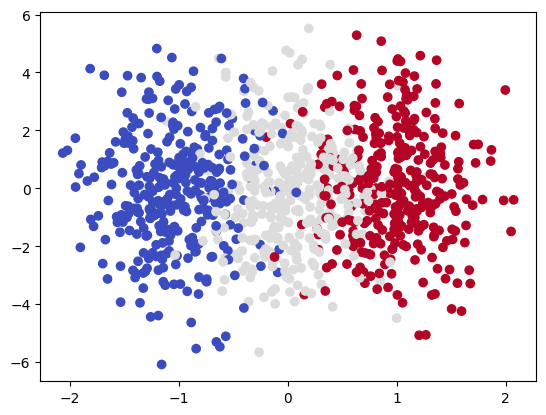

In [48]:
#DONE
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

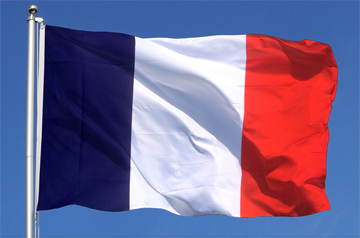

Run your `one_NN_vanilla` and `k_NN_vanilla` on this data set in the code below.

In [49]:
print(k_fold_cross_validation(X, y, one_NN_vanilla, similarity_1))


0.7739999999999999


In [50]:
print(k_fold_cross_validation(X, y, k_NN_vanilla, similarity_1))

0.833


DONE:: what accuracies did you get for the two different algorithms? Which is better and why?

I got an accuracy of 0.783 for the one_NN_vanilla. I got an accuracy of 0.833 for k_NN_vanilla.

The k_NN_vanilla is better. I believe the k_NN_vanilla is better because it is better at classifying the samples that may be harder to decide if you only could look at one neighbor. But by expanding the nearest neighbors it makes the classification easier by taking the majority class of the nearest samples.

So in real life, there are certain features that are not that important and some features that are more important. For example, you are assessing the price of a house, the lattitude and longitude of the house is not that big a deal, compared to the rest of the features, such as the area, the flooring, the roofing. If two houses share similar important features, then their prices are likely to be close. On the other hand if two houses share only non-important features, then their prices can be very different.

In summary, feature weighting will modify how "distance" is measured between samples.

##manually

DONE:: modify your ``one_NN_vanilla`` into ``one_NN_manual_weighted``. You will manually weight certain features more than some other features. Try different weights. You want to get a higher accuracy by doing this.

In [51]:
import array as arr
import numpy as np
x = arr.array('f',[-1.3,1])
t = arr.array('f',[-1.4,-2.8])
sim = np.subtract(x,t)
print(sim)
weights = [0.5,2]
np.multiply(weights,sim)

[0.10000002 3.8       ]


array([0.05000001, 7.5999999 ])

In [52]:
import math
# weight feature X[0] more
class one_NN_manual_weighted:
    #DONE
    def __init__(self):
        self.case_base_x = []
        self.case_base_y = []
        self.metric = None

    def training(self,Xs, ys):
        self.case_base_x = Xs
        self.case_base_y = ys

    def use_similarity_metric(self,op):
        self.metric = op

    def testing(self,query):
        neighbor_index = None
        min_dis = math.inf
        weights = [8,0.2]
        weighted_query = np.multiply(query,weights)

        for i in range(len(self.case_base_x)):
          sample = self.case_base_x[i]
          weighted_sample = np.multiply(sample,weights)
          dis = self.metric(weighted_sample,weighted_query)
          if dis < min_dis:
            min_dis = dis
            neighbor_index = i
        return self.case_base_y[neighbor_index]




Run the scrip below. You should get higher accuracy than `one_NN_vanilla `. If not, go back and revise.

In [53]:
print(k_fold_cross_validation(X, y, one_NN_manual_weighted, similarity_1))

0.813


Note:: it's very unlikely you get perfect accuracy, but it should be a better accuracy.

##automatically



But here is the thing, even if you know something is important, something is not, how do you convey that idea to your k-NN classifier? In kNN, every feature carries a weight, which can reflected as a number. By default, you can imagine all features are weighted equally and their weights are all `1`. It would be nice that if you can make claims such as "the area of a house is 3-unit important, while the flooring is 2-unit important". But it's very hard to come up with such number that is fair and generalize well to our data set.

In other words, we are trying to build a k-NN that weight different features differently. A feature-weighted k-NN.

Only if our machine can learn the weighting by themselves. Hence incomes machine learning.

We will implement a simple variation of an online optimization method mentioned in section 3.1.1 in this survey https://link.springer.com/article/10.1023/A:1006593614256

The idea is very simple. Feature weightings are important in the measuring of similarities, (but not in the voting). We will start out with equal weightings for all features (start out to be 1). We will then try to use our k-NN to classify queries. For the sake of simplicity, let's set k to 1. Since our research focus here is not about the k, but about the weighting of features. We will also NOT weight instances' votes based on their distance, since this is not the focus.

Here is how the weight training works: Given a query q= (q1,q2), if our k-NN retrieves a good case (x1, x2). A good case means that the classification is correct. Let's say the feature differences are <|x1-q1|, |x2-q2|>. The total distance is thus w1|x1-q1|+ w2|x2-q2|. We want to modify the weightings such that, in the future, we are going to continue retrieving the good case, in other words, we want to decrease the total distance, we can do this by lowering w1 and w2.

On the other hand, if we retrieve a bad case (y1, y2), then the total distance is w1|y1-q1|+ w2|y2-q2|. We want to modify the weightings such that, in the future, we are less likely to retrieve this bad case. So we want to increase the total distance, by increasing w1 and w2.


###Design questions


Here comes the first design question. We are going to increase w1 w2 when bad neighbor is retrieved, and decrease w1 w2 when good neighbor is retrieved. How do you plan to do that? Or more specifically, by how much do you plan to modify the weights? You don't have to answer this in words, but it will help you a lot if you think this out first and write out your thoughts before building the code below.

Here comes the second design question: we will train k-NN on some samples, and then train the weighting with some more samplee. They cannot be the same samples. Because if they are, then our k-NN memorize those samples and will provide a perfect retrieval (it will just find the query in its case base). So it is always right, there is no need to training weighting.

The only way this makes sense, is that the k-NN starts with some samples in its case base, and train its weighting with some other samples. One way to do this, is the famouse leave-one-out method (some call it leave-one-out testing).

DONE:: learn about leave-one-out testing on your own.

HARD DONE::Implement feature-weighted 1-NN by modifying your one_NN_vanilla

Hint: Your will also train the weighting in the training function. You will use testing() to simulate retrieval in leave-one-out testing.

Hint: You will use weighting in testing().

In other words, you train with n-1 cases, and leave one case out for testing. You test classifying that one case. If correctly classified, do something with the weighting; if incorrectly classified, do something else with the weighting. Repeat this process, until some criteria are met.

In [54]:
from copy import deepcopy
import math
##IMPORTANT, you should never use case base in a global manner.
##Do no uncomment things below, they can lead to bugs.
# case_base_x = []
# case_base_y = []
class feature_weighted_one_NN:
    #DONE
    def __init__(self):
        self.case_base_x = []
        self.case_base_y = []
        self.feature_weights = []
        self.metric = None

    def training(self,Xs, ys):
        #DONE:
        self.feature_weights = [1.0] * len(Xs[0])
        self.case_base_x = Xs
        self.case_base_y = ys

        for i in range(len(self.case_base_x)):

          # Leave-one-out
          without_ith_sample = np.delete(self.case_base_x, i, axis=0)
          labels_without_ith_sample = np.delete(self.case_base_y, i, axis=0)

          ith_sample = self.case_base_x[i]
          ith_label = self.case_base_y[i]

          similarities = []
          for sample in range(len(without_ith_sample)):
            similarity = self.metric(ith_sample,without_ith_sample[sample])
            similarities.append(similarity)

          nearest_neighbor = np.argmin(similarities)
          nearest_neighbor_class = labels_without_ith_sample[nearest_neighbor]

          feature_distances = []

          for f in range(len(self.case_base_x[nearest_neighbor])):
            f_dist = abs(self.case_base_x[nearest_neighbor][f] - ith_sample[f])
            feature_distances.append(f_dist)


          most_important = feature_distances.index(min(feature_distances))
          least_important = feature_distances.index(max(feature_distances))

          for w in range(len(self.feature_weights)):
            if w == most_important and nearest_neighbor_class == ith_label:
                self.feature_weights[w] -= 0.3
            elif w == least_important and nearest_neighbor_class != ith_label:
                self.feature_weights[w] += 0.3
            else:
              # Adjust the weight to ensure it's positive
              self.feature_weights[w] += 0.1

        # Normalize the weights to ensure they sum to 1.0
        weight_sum = sum(self.feature_weights)
        self.feature_weights = [f / weight_sum for f in self.feature_weights]

        print("feature weighting after training \n" , self.feature_weights)
        return self.feature_weights


    def use_similarity_metric(self,op):
        self.metric = op

    def testing(self,query):
        #DONE:
        distances = []
        weighted_query = np.multiply(self.feature_weights,query)

        for i in range(len(self.case_base_x)):
          weighted_sample = np.multiply(self.feature_weights,self.case_base_x[i])
          distance = self.metric(weighted_query,weighted_sample)
          distances.append(distance)

        nearest_neighbor = np.argmin(distances)

        return self.case_base_y[nearest_neighbor]

def similarity_1(x, y):
    #use absolute distance between the features of two samples
    # or absolute norm
    #https://en.wikipedia.org/wiki/Norm_(mathematics)
    #DONE
    return np.sum(np.abs(x - y))

In [55]:
print(k_fold_cross_validation(X, y, feature_weighted_one_NN, similarity_1))


feature weighting after training 
 [0.9731343283582075, 0.026865671641792554]
feature weighting after training 
 [0.9969604863221854, 0.003039513677814596]
feature weighting after training 
 [0.9194029850746246, 0.08059701492537538]
feature weighting after training 
 [0.9881656804733705, 0.011834319526629486]
feature weighting after training 
 [0.9910447761194005, 0.008955223880599467]
feature weighting after training 
 [1.0413533834586433, -0.041353383458643235]
feature weighting after training 
 [0.9781249999999982, 0.021875000000001744]
feature weighting after training 
 [1.027303754266209, -0.027303754266208787]
feature weighting after training 
 [0.9418604651162766, 0.05813953488372341]
feature weighting after training 
 [1.0312499999999982, -0.03124999999999824]
0.8099999999999999


The ``k_fold_cross_validation `` should output an accuracy. Record your accuracy. Is it better than the vanilla 1-nn? The accuracy is better than vanilla 1-nn

DONE:: Modify your code so that you output the feature weighting after training, and run the last k-fold experiment again. Record the feature weighting down below. In general, your feature weighting should show that it emphasize feature 0 more than feature 1. Your feature weighting might be different, based on how you write your training algorithm but that trend of feature 0 being more important should be observed.

```
feature weighting after training
 [0.9731343283582075, 0.026865671641792554]
feature weighting after training
 [0.9969604863221854, 0.003039513677814596]
feature weighting after training
 [0.9194029850746246, 0.08059701492537538]
feature weighting after training
 [0.9881656804733705, 0.011834319526629486]
feature weighting after training
 [0.9910447761194005, 0.008955223880599467]
feature weighting after training
 [1.0413533834586433, -0.041353383458643235]
feature weighting after training
 [0.9781249999999982, 0.021875000000001744]
feature weighting after training
 [1.027303754266209, -0.027303754266208787]
feature weighting after training
 [0.9418604651162766, 0.05813953488372341]
feature weighting after training
 [1.0312499999999982, -0.03124999999999824]
0.8099999999999999
```

This is the result I got after training:

```
feature weighting after training
[1.6229397055078298, 0.37706029449217027]
feature weighting after training
[1.711692981294651, 0.28830701870534886]
feature weighting after training
[1.7121011406263515, 0.28789885937364856]
feature weighting after training
[1.6458513857104748, 0.35414861428952515]
feature weighting after training
[1.642525202025682, 0.3574747979743179]
feature weighting after training
[1.7922455367726644, 0.20775446322733537]
feature weighting after training
[1.640937940601624, 0.35906205939837615]
feature weighting after training
[1.55324683795214, 0.44675316204786003]
feature weighting after training
[1.7422429706905787, 0.25775702930942146]
feature weighting after training
[1.6009421890631992, 0.3990578109368006]
0.7990000000000002
```

Second note:: I tried an alternative design of weight updaing policy. This is the result I got. I argue that both results make sense, but in difference senses.

```
feature weighting after training
[1.0070156266977478e-35, 2.0]
feature weighting after training
[2.0, 3.0628274162212846e-38]
feature weighting after training
[2.0, 3.516708056240985e-38]
feature weighting after training
[2.0, 2.8911164669493937e-38]
feature weighting after training
[2.0, 5.9074992344650864e-36]
feature weighting after training
[2.0, 2.212110859452655e-38]
feature weighting after training
[2.0, 3.6706359259380467e-38]
feature weighting after training
[2.0, 4.819942321245734e-38]
feature weighting after training
[2.0, 1.9968223465037447e-38]
feature weighting after training
[2.0, 2.4780479442086156e-38]
0.756
```


Depends on your feature weighting policy, you might get better or worse accuracy. A very well designed policy should get you a better accuracy, but know that for this assignment, it's OK if your feature-weighted 1-nn performs slightly worse than a vanilla 1-nn. This is because feature weighting is actually hard. It's related to topics like overfitting, order of training samples, stochastic, annealing training ... You are not required to develop a perfect feature weighting policy.

On the other hand, your feature weighted 1-NN shouldn't perform too bad. The weighting it outputs eventually shouldn't be too absurd. For example, if it says that all features are not important or that only one feature is important (but we humans know it's not), then it's absurd. Try your best to make your feature-weighted 1-NN reasonably good.

BOTTOM LINE:: your feature weighted 1-NN should give out a weighting that is not uniform, and it shouldn't do too bad when compared to a vanilla 1-NN. This is the most important TODO in the whole assignment. Take your time to revise it. It took me 3-4 hour to find a sweet spot that works nicely.

Looking at it, I can see that majority of the time, my feature weighting is trained properly.

DONE:: If you encounter some flawed situation (which is likely to occur if you run multiple times), can you explain why your training algorithm is flawed?

I think mine is flawed because I get the same feature weights on each training iteration. I am not sure how this is happening.

Also, I initially was getting an error mentioning a problem with performing an operation with zero or NaN.

Another flaw is I do not account for all features having some importance I am focusing mainly on the least important and most important.

Extra Credit (1):: What measures are you taking to fix the flaw? I went to make sure Leave-one-out testing was implemented correctly. Then, I tried to update thr weights to reflect all features having some effect; however, I am struggling to do so without completely messing up the weighting.

Note: I changed the else condition to increase the weights a little if it is not the least or most important and then normalized the weights. This change produced the results I am getting now.

Note:: my original design was flawed that I was getting in consistent weights, some of which even weight feature 1 more than feature 0.

Machine learning is not always about neural network. Any parameter learning done by a machine, any model training done by a machine, can be argued as a form of machine learning. Decision tree's branching can be learned by ML, and feature-weighted k-nn's feature weighting, can be learned by ML.

##Test on real data

Let's try our different algorithm on some data sets other than the iris data set.

In [56]:
# prompt: load sklearn diabetes data set

import sklearn.datasets
Xs, ys = sklearn.datasets.load_wine(return_X_y=True)
print(Xs.shape)
print(ys.shape)


(178, 13)
(178,)


In [57]:
Xs.shape

(178, 13)

DONE:: modify the code below to make it work for your ``one_NN_vanilla``, ``k_NN_vanilla``, ``instance_weighted_k_NN`` and ``feature_weighted_one_NN``. Do not modify the ratio `test_size=0.5`. It is intentional to make the task more challenging. For every split, you want to train and test your models on the same training/testing (If you rerun the split, the split will be different because of a different random state). This is to ensure fairness between comparisons.

NOTE:: there is a lot of redundancy in the code below and multiple segments can be abstracted into one function. But I left it there, in case you want to do some custom behavior for your models. You will likely to modify the code below to make it work for your different models. Just so you know that this is bad coding practice, and they should be abstracted into a general function.

NOTE:: Experimenting a seemingly easy algorithm might expose some unforeseen bug. In my case, I encountered a very weird bug where some multiplication made my weights become NAN (not a number). It's likely that you will encounter something too. Work you way to fix whatever bug shows up. You might need to be creative about the math.

In [58]:
# prompt: split my Xs and ys based on a specific ratio

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

for i in range(10):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.5)

    model = one_NN_vanilla()
    model.training(X_train, y_train)
    model.use_similarity_metric(similarity_1)
    accuracies = []
    y_pred = []
    for x in X_test:
      y_pred.append(model.testing(x))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("vanilla 1-NN accuracy: ", np.mean(accuracies))

    model = k_NN_vanilla(5)
    model.training(X_train, y_train)
    model.use_similarity_metric(similarity_1)
    accuracies = []
    y_pred = []
    for x in X_test:
      y_pred.append(model.testing(x))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("vanilla k-NN accuracy: ", np.mean(accuracies))

    model = instance_weighted_k_NN(5)
    model.training(X_train, y_train)
    model.use_similarity_metric(similarity_1)
    accuracies = []
    y_pred = []
    for x in X_test:
      y_pred.append(model.testing(x))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("instance-weighted k-NN accuracy: ", np.mean(accuracies))

    model = feature_weighted_one_NN()
    model.use_similarity_metric(similarity_1)
    model.training(X_train, y_train)
    accuracies = []
    y_pred = []
    for x in X_test:
      y_pred.append(model.testing(x))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print("feature_weighted_one_NN accuracy: ", np.mean(accuracies))
    print("")






vanilla 1-NN accuracy:  0.7865168539325843
vanilla k-NN accuracy:  0.7528089887640449
instance-weighted k-NN accuracy:  0.7640449438202247
feature weighting after training 
 [0.09209302325581392, 0.07720930232558136, 0.06232558139534886, 0.08465116279069765, 0.09581395348837209, 0.0883720930232558, 0.08093023255813951, 0.03627906976744196, 0.07348837209302325, 0.09023255813953486, 0.043720930232558096, 0.07720930232558136, 0.09767441860465113]
feature_weighted_one_NN accuracy:  0.7640449438202247

vanilla 1-NN accuracy:  0.8876404494382022
vanilla k-NN accuracy:  0.7415730337078652
instance-weighted k-NN accuracy:  0.7640449438202247
feature weighting after training 
 [0.0860314523589269, 0.07678075855689176, 0.06567992599444959, 0.08233117483811284, 0.09158186864014804, 0.08048103607770583, 0.08418131359851988, 0.017576318223866856, 0.07678075855689176, 0.09343200740055506, 0.05457909343200747, 0.08418131359851988, 0.1063829787234043]
feature_weighted_one_NN accuracy:  0.8764044943820

DONE:: discuss your results. Which model is good, which model is bad? Overall, the vanilla k-nn model seems to perform the worst. While, either the  vanilla 1-nn or the feature weighted 1-nn seems to perform the best.

DONE:: print out the feature weightings your feature-weighted 1-NN learned. What does that feature weighting tell you? My feature weighting tells me which features are the most important or least important of all the features. It does not account for all features having an effect on classification because if it is not least or most important it is 1.

DONE:: Discuss other weird / interesting thing you noticed, if any. I also noticed in my weighting that it does not often get the class right in the leave-one-out testing because the least or most important features are barely changed from the original value of 1.

#Feature-weighted k-NN

Extra Credit (2) TODO:: combine your code above about k-NN and Feature-weighted 1-NN, so that it becomes a feature-weighted k-NN.

There are a few ways to do this, and your design could be creative. For example, you can retrieve k cases during retrieval, and modify weightings based on the k cases. In your testing, you test just like a k-NN, but features are now weighted during the distance calculation.

To receive this extra credit, try your new model on the iris data set.

#k-NN on regression.

Everything above has been about regression. Let's take one more step, and try with a regression data set.

In [59]:
# prompt: load california housing data set into Xs and ys

from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
Xs = california_housing.data
ys = california_housing.target


In [60]:
len(Xs)

20640

In [61]:
Xs.shape

(20640, 8)

In [64]:
ys

array([1.364  , 1.434  , 3.571  , 3.216  , 0.741  , 0.427  , 0.956  ,
       1.372  , 1.91   , 1.8    , 3.508  , 1.241  , 1.475  , 0.858  ,
       1.25   , 2.675  , 1.701  , 3.537  , 2.293  , 1.695  , 0.734  ,
       1.087  , 2.639  , 0.929  , 1.115  , 1.582  , 1.125  , 0.806  ,
       0.775  , 1.     , 3.025  , 0.69   , 1.946  , 2.086  , 1.544  ,
       1.468  , 3.606  , 3.619  , 2.37   , 1.875  , 0.958  , 0.559  ,
       0.425  , 2.656  , 0.991  , 3.977  , 5.00001, 2.444  , 1.625  ,
       1.582  , 2.75   , 4.388  , 5.00001, 1.946  , 1.856  , 2.268  ,
       1.597  , 4.454  , 5.00001, 2.103  , 5.00001, 0.885  , 1.599  ,
       2.89   , 5.00001, 0.777  , 3.152  , 0.436  , 0.635  , 0.849  ,
       3.338  , 1.691  , 3.026  , 2.546  , 1.474  , 1.942  , 2.346  ,
       2.479  , 3.3    , 4.417  , 1.868  , 1.114  , 2.417  , 3.614  ,
       5.00001, 1.345  , 0.669  , 2.286  , 1.341  , 2.864  , 0.951  ,
       0.9    , 1.444  , 1.448  , 5.00001, 1.836  , 2.337  , 1.018  ,
       1.586  , 0.91

DONE:: study the data set online. What's the meaning of each of the attributes, what's the meaning of the target y value. Which one features would you think are important, which ones not.

There are 8 attributes:
1. MedInc - median income in block group
2. HouseAge - median house age in block group
3. AveRooms - average number of rooms per household
4. AveBedrms - average number of bedrooms per household
5. Population - block group population
6. AveOccup - average number of household members
7. Latitude - block group latitude
8. Longitude - block group longitude

The target y value is the median house value for California districts, expressed in hundreds of thousands of dollars.

The code below will take 1000 samples from the 20k samples randomly.

In [63]:
# prompt: take 1000 samples randomly

indices = np.random.choice(list(range(len(Xs))), 1000)
Xs = Xs[indices]
ys = ys[indices]


DONE:: build a k-NN that works with regression data. Modify `k_NN_vanilla` into `k_NN_regression`. This requires some creativity. How would you make k-NN work for numbers instead of class labels.

In [71]:
class k_NN_regression:

    def __init__(self, k = 3):
        self.case_base_x = []
        self.case_base_y = []
        self.metric = None
        self.k = k
    #DONE
    def training(self,Xs,ys):
        self.case_base_x = Xs
        self.case_base_y = ys

    def use_similarity_metric(self,op):
        self.metric = op

    def testing(self,query):
      '''
      Calculates all distances from query.
      Sorts those distances in ascending order.
      Finds mean of nearest neighbors to query.
      Returns the mean.
      '''

      distances = [self.metric(query,self.case_base_x[i]) for i in range(len(self.case_base_x))]
      k_nearest = np.argsort(distances)[:self.k] # sorts array by distances in ascending order, take first k
      predictions = [self.case_base_y[i] for i in k_nearest]
      mean = np.mean(predictions)
      return mean


In [73]:
errors = []
# for i in range(10):
  # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.1)
model = k_NN_regression(5)
model.training(X_train, y_train)
model.use_similarity_metric(similarity_1)
y_pred = []
for x in X_test:
  y_pred.append(model.testing(x))
errors.append(np.mean(np.abs(y_test-y_pred)))
print("average error: ", np.mean(errors))

average error:  0.99418288


I got an average error  0.9 ish

##Feature-weighted 1-NN for regression

Extra Credit (2) TODO:: modify your feature-weighted 1-NN, so that it works with regression data set.


Certain steps might feel hard. Be creative.

In [ ]:
from copy import deepcopy
import math
##IMPORTANT, you should never use case base in a global manner.
##Do no uncomment things below, they can lead to bugs.
# case_base_x = []
# case_base_y = []
class feature_weighted_one_NN_regression:
    #TODO

def similarity_1(x, y):
    #use absolute distance between the features of two samples
    # or absolute norm
    #https://en.wikipedia.org/wiki/Norm_(mathematics)
    #TODO
    return np.sum(np.abs(x - y))

Test your new function with the following code. This code may take some time to run. This is

In [ ]:
errors = []
# for i in range(10):
  # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.1)
model = feature_weighted_one_NN_regression()
model.training(X_train, y_train)
model.use_similarity_metric(similarity_1)
y_pred = []
for x in X_test:
  y_pred.append(model.testing(x))
errors.append(np.mean(np.abs(y_test-y_pred)))
print("average error: ", np.mean(errors))

feature weighting after training
[1.090607066757409e-22, 2.95165169511219, 2.614442739842447e-51, 2.964766329465066e-93, 5.048348304887811, 5.73066816082254e-74, 4.674622103793924e-39, 3.449011434764399e-39]
average error:  1.1548208000000002


Note:: I actually get worse accuracy 1.2-ish. There is definitely overfitting going on in my training.

And honestly, there is no easy fix for my policy. This policy works well for classification but not as much for regression.


Bring your policy to class and let's discuss more. Remind me to discuss this in class when we review the homework.